In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
import datetime
import matplotlib.dates as mdates
%matplotlib inline
import pickle

Update end date below to the previous day's date

In [2]:
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%m/%d/%Y')

'01/13/2022'

In [3]:
x = pd.date_range(start='3/25/2020', end=yesterday)
date_list = []
for date_value in x.strftime('%m-%d-%Y'):
    date_list.append(date_value)
dt_date_list = pd.to_datetime(pd.Series(date_list))

https://github.com/CSSEGISandData/COVID-19

In [4]:
df_jhu_total_dict= {}
for y in range(len(date_list)):
#    !sleep 3
    url_value = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + date_list[y] + r'.csv'
    df_jhu_total_dict[date_list[y]] = pd.read_csv(url_value,header=0)
    df_jhu_total_dict[date_list[y]]['dt_date'] = dt_date_list[y]
    print(date_list[y])

03-25-2020
03-26-2020
03-27-2020
03-28-2020
03-29-2020
03-30-2020
03-31-2020
04-01-2020
04-02-2020
04-03-2020
04-04-2020
04-05-2020
04-06-2020
04-07-2020
04-08-2020
04-09-2020
04-10-2020
04-11-2020
04-12-2020
04-13-2020
04-14-2020
04-15-2020
04-16-2020
04-17-2020
04-18-2020
04-19-2020
04-20-2020
04-21-2020
04-22-2020
04-23-2020
04-24-2020
04-25-2020
04-26-2020
04-27-2020
04-28-2020
04-29-2020
04-30-2020
05-01-2020
05-02-2020
05-03-2020
05-04-2020
05-05-2020
05-06-2020
05-07-2020
05-08-2020
05-09-2020
05-10-2020
05-11-2020
05-12-2020
05-13-2020
05-14-2020
05-15-2020
05-16-2020
05-17-2020
05-18-2020
05-19-2020
05-20-2020
05-21-2020
05-22-2020
05-23-2020
05-24-2020
05-25-2020
05-26-2020
05-27-2020
05-28-2020
05-29-2020
05-30-2020
05-31-2020
06-01-2020
06-02-2020
06-03-2020
06-04-2020
06-05-2020
06-06-2020
06-07-2020
06-08-2020
06-09-2020
06-10-2020
06-11-2020
06-12-2020
06-13-2020
06-14-2020
06-15-2020
06-16-2020
06-17-2020
06-18-2020
06-19-2020
06-20-2020
06-21-2020
06-22-2020
06-23-2020

In [5]:
with open(yesterday.strftime('%d_%b_%Y') + r'_JHU_total_data.pkl', 'wb') as ofile:
    pickle.dump(df_jhu_total_dict, ofile)

In [6]:
!ls -alt *.pkl


-rw-r--r-- 1 ldhagen ldhagen 328162038 Jan 14 08:41 13_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   6245878 Jan 13 15:43 12_Jan_2022_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 327645770 Jan 13 07:13 12_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   6236153 Jan 12 14:03 11_Jan_2022_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 327129502 Jan 12 08:42 11_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   6226411 Jan 11 17:00 10_Jan_2022_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 326613234 Jan 11 11:28 10_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 326096949 Jan 10 12:14 09_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 325580664 Jan  9 16:23 08_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 325064379 Jan  8 16:40 07_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   6197193 Jan  8 15:26 07_Jan_2022_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   6187468 Jan  7 14:53 06_Jan_2022_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 32454

with open('11_Jan_2022_JHU_total_data.pkl', 'rb') as ifile:
    df_jhu_total_dict = pickle.load(ifile)

In [7]:
len(df_jhu_total_dict)

660

df_jhu_additional_dict = {}
url_value = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-28-2021.csv'
df_jhu_additional_dict['12-28-2021'] = pd.read_csv(url_value,header=0)

df_jhu_additional_dict

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
total_key_list = list(df_jhu_total_dict.keys())
part_key_list = total_key_list[300::]

In [10]:
def process_combined_key_confirmed(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Confirmed']]
    ccc = bbb.set_index('dt_date')
    ddd = ccc.diff(periods = 1)
    ddd_7day_moving = ddd.rolling(7).mean().shift()
    return(ddd,passed_combined_key,ddd_7day_moving)

comkey = 'Bexar, Texas, US'
aaa = df_jhu_total_dict[date_list[-10]].loc[df_jhu_total_dict[date_list[-10]].Combined_Key == comkey]

In [11]:
def chart_daily_confirmed(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Cases')
    plt.xlabel('Date',color='black')
    plt.ylabel('New COVID Cases',color='black')
    plt.bar(passed_df.index,passed_df.Confirmed)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Active Cases'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')
plt.close()

In [12]:
def process_combined_key_deaths(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Deaths']]
    ccc = bbb.set_index('dt_date')
    ddd = ccc.diff(periods = 1)
    ddd_7day_moving = ddd.rolling(7).mean().shift()
    return(ddd,passed_combined_key,ddd_7day_moving)

In [32]:
def chart_daily_deaths(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Deaths')
    plt.xlabel('Date',color='black')
    plt.ylabel('New COVID Deaths',color='black')
    plt.bar(passed_df.index,passed_df.Deaths, color = 'black')
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Deaths'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')
plt.close()

Bexar, Texas, US
Bexar, Texas, US
Dallas, Texas, US
Dallas, Texas, US
Harris, Texas, US
Harris, Texas, US
Travis, Texas, US
Travis, Texas, US


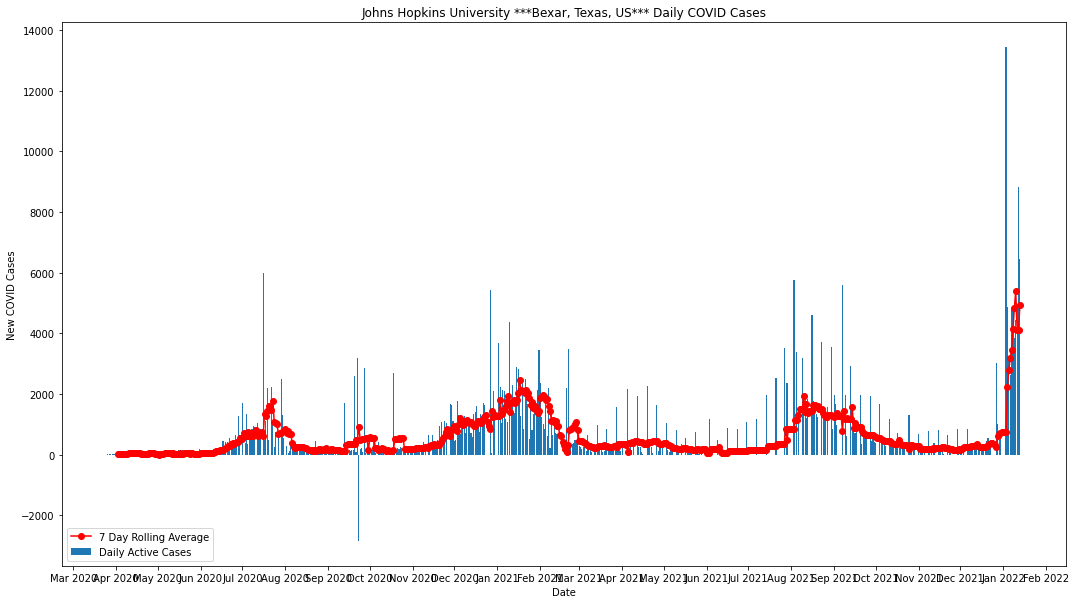

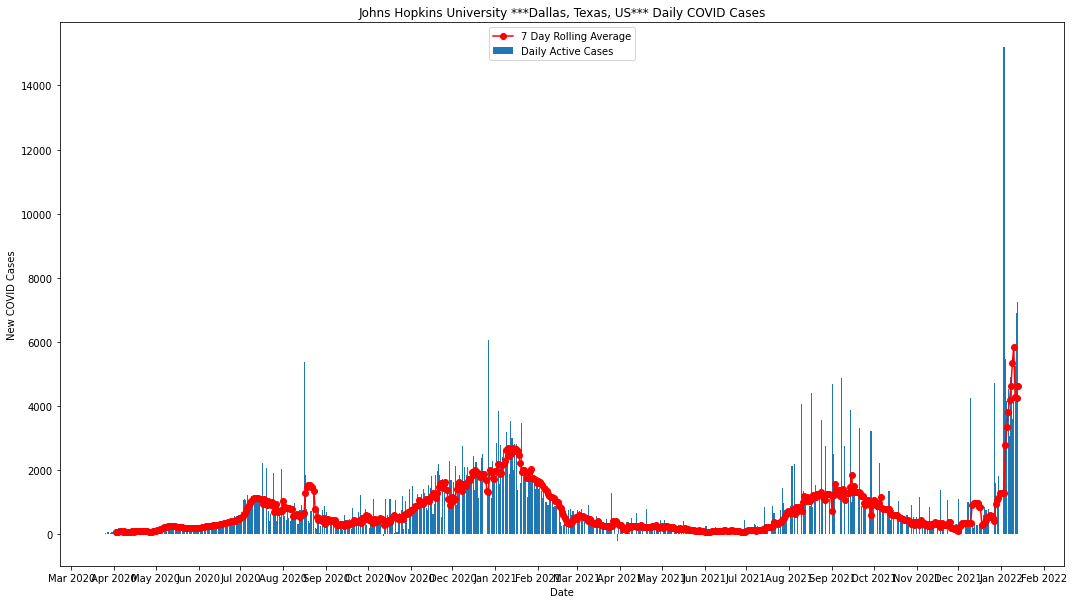

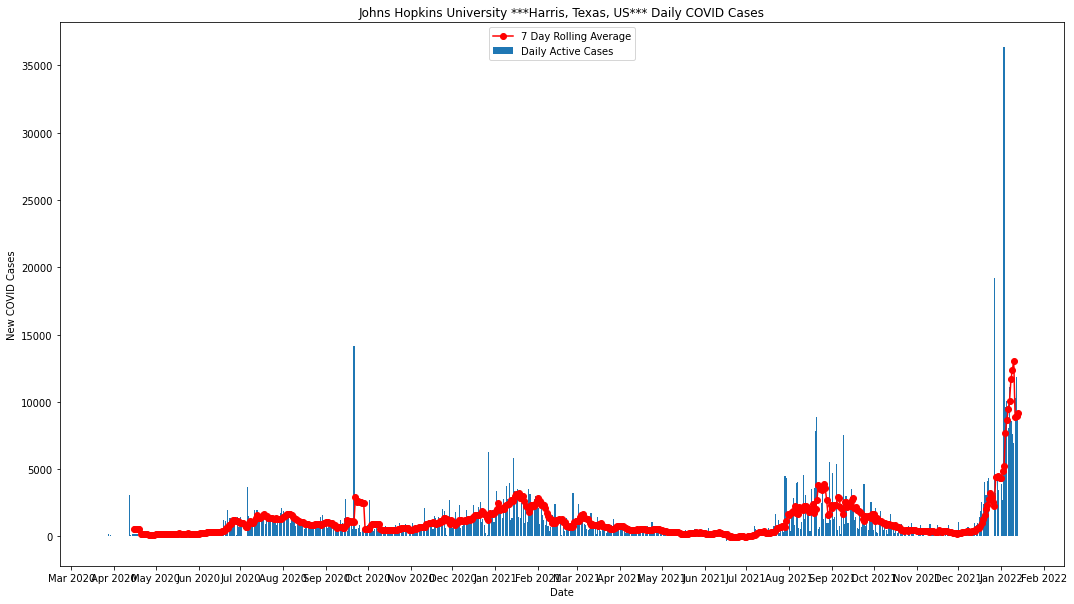

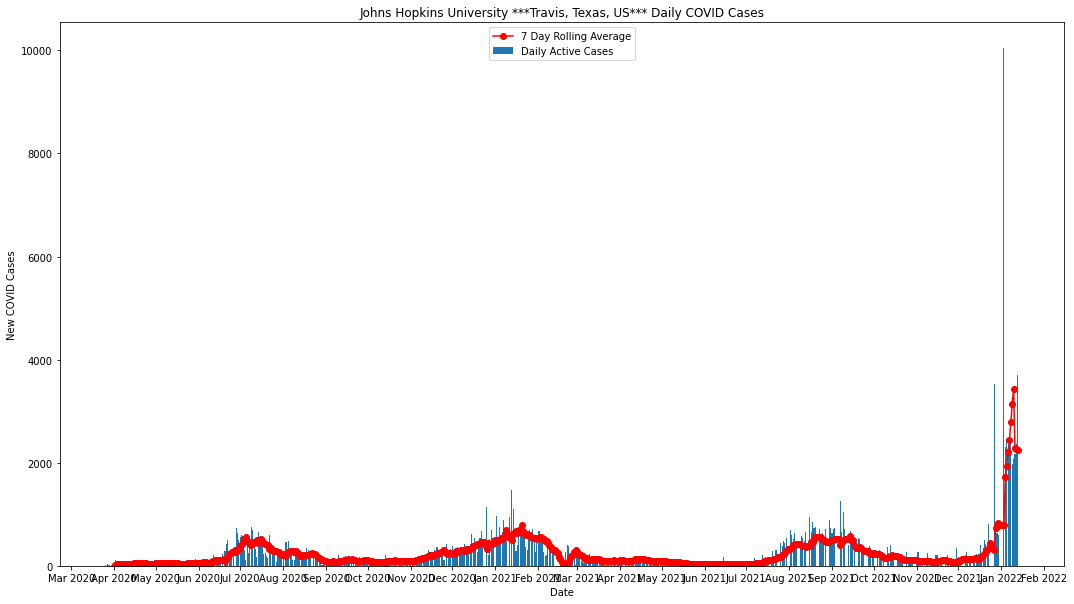

In [14]:
shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' New York, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

In [15]:
short_dict = {}
short_keys = date_list[-400:] 
for x in short_keys:
    short_dict[x] = df_jhu_total_dict[x]

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' New York, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

Bronx, New York, US
Bronx, New York, US
Kings, New York, US
Kings, New York, US
New York, New York, US
New York, New York, US
Queens, New York, US
Queens, New York, US
Richmond, New York, US
Richmond, New York, US


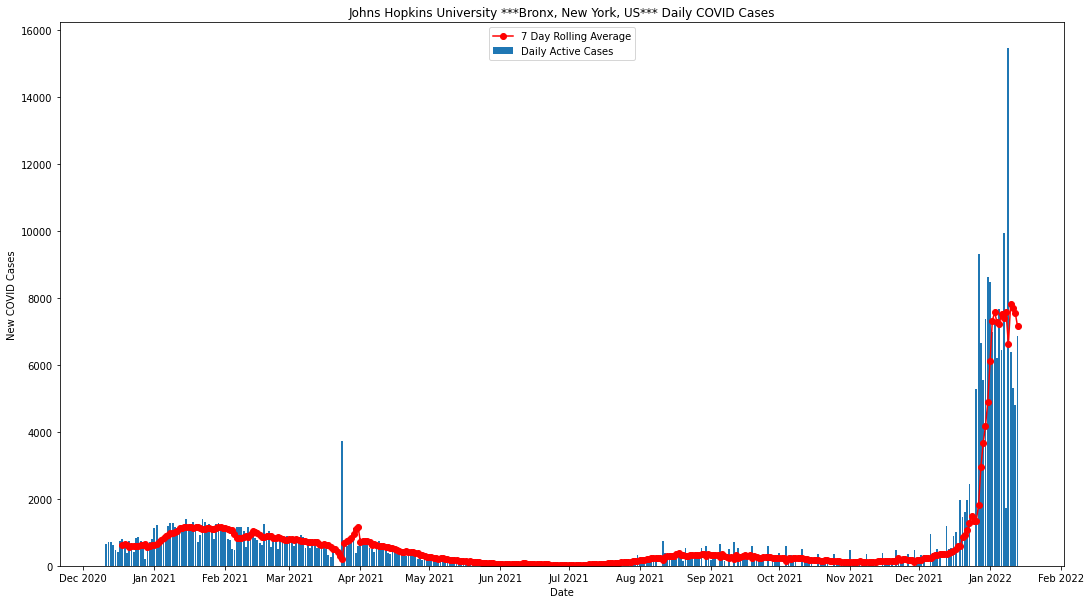

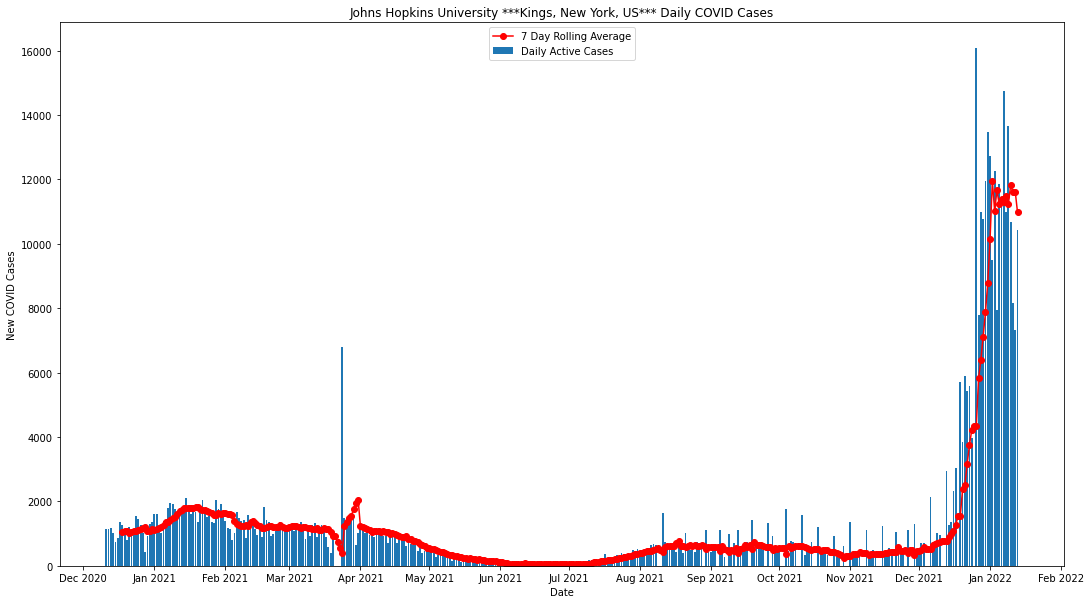

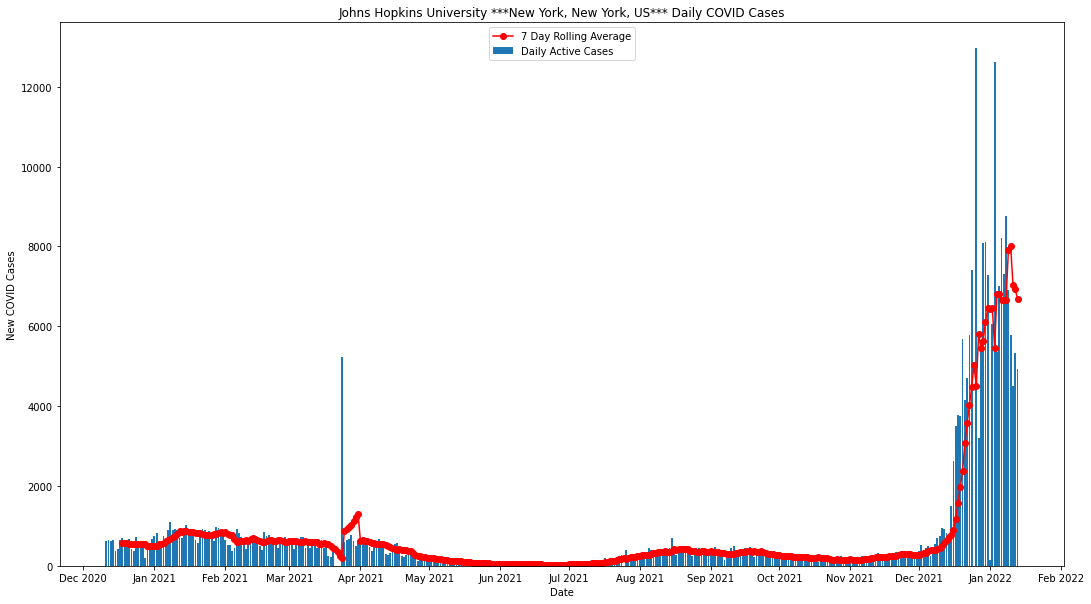

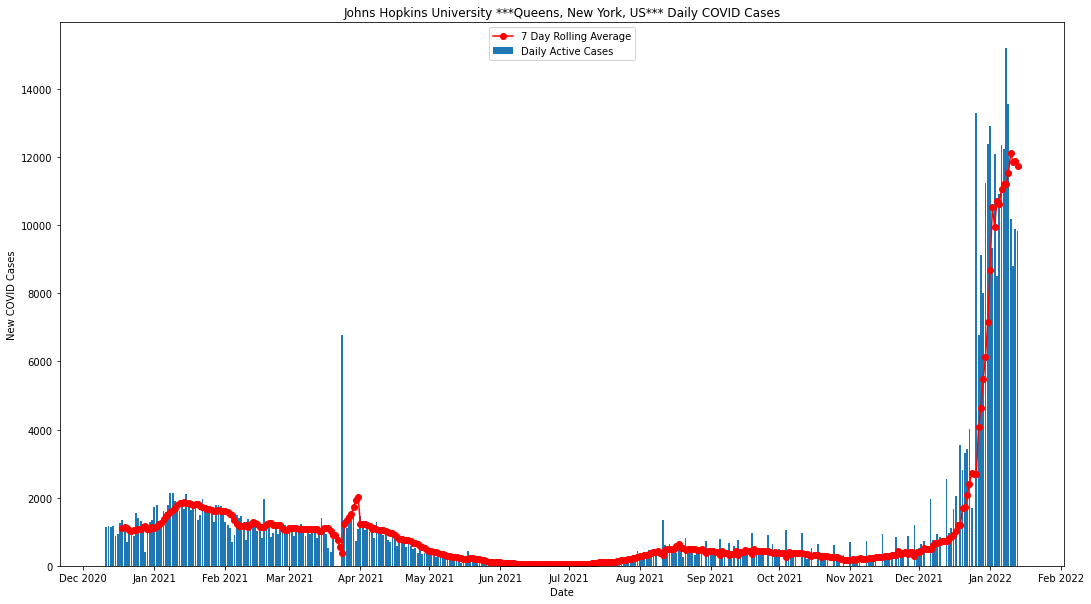

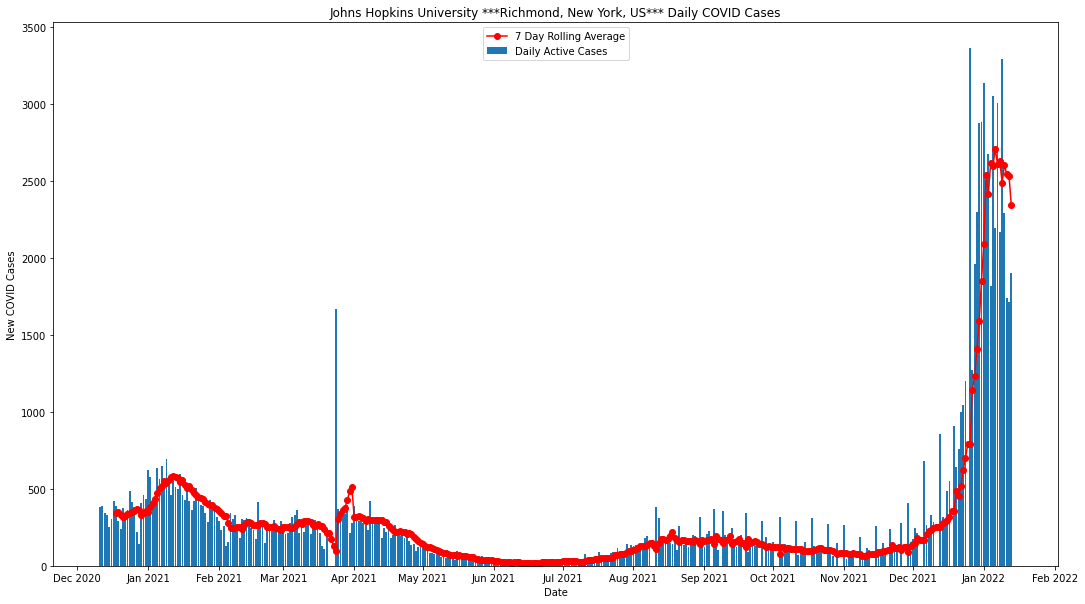

In [16]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_confirmed(short_dict, short_keys, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])
    

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Florida, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Florida, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' California, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_deaths(df_jhu_total_dict, short_keys, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

Bexar, Texas, US
Bexar, Texas, US
Dallas, Texas, US
Dallas, Texas, US
Harris, Texas, US
Harris, Texas, US
Travis, Texas, US
Travis, Texas, US


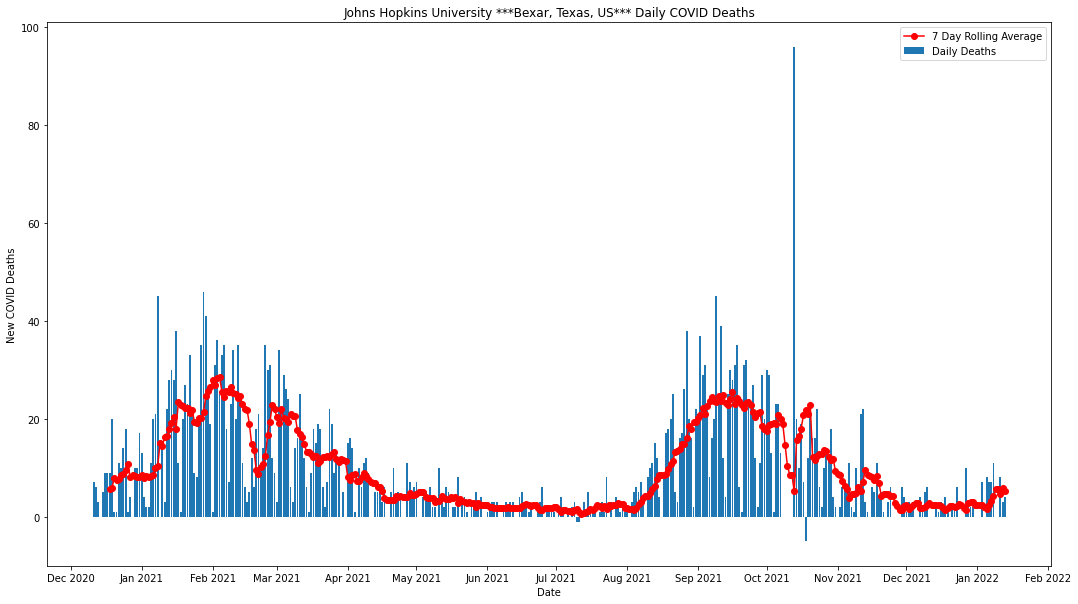

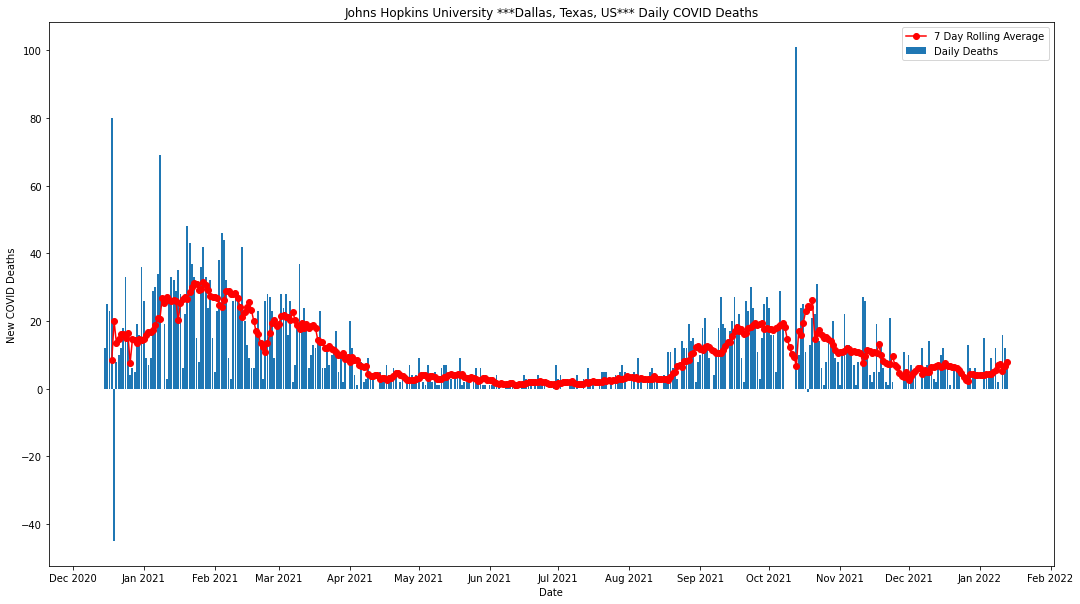

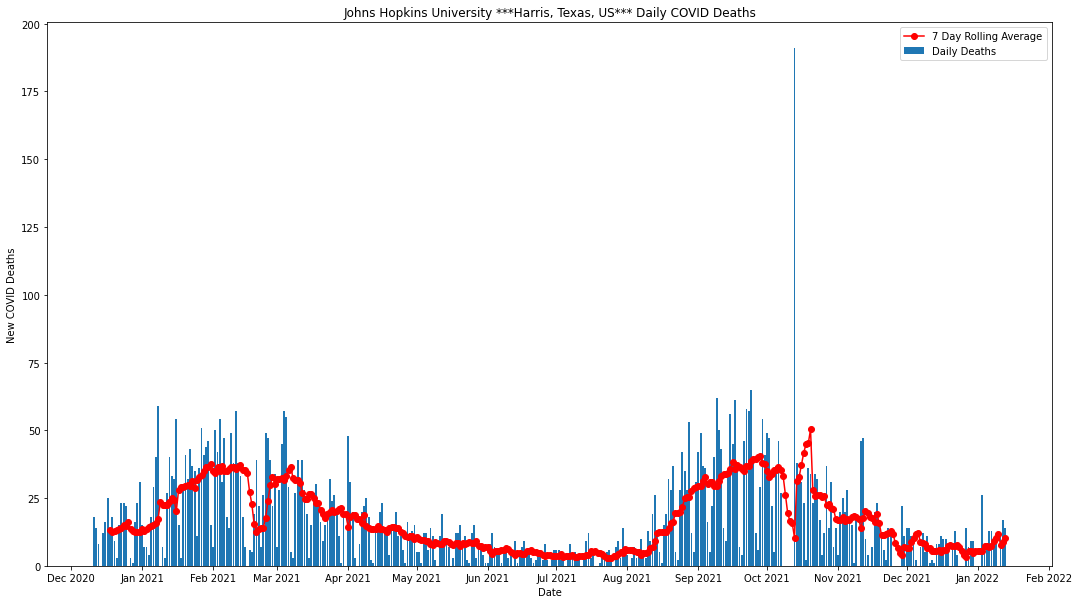

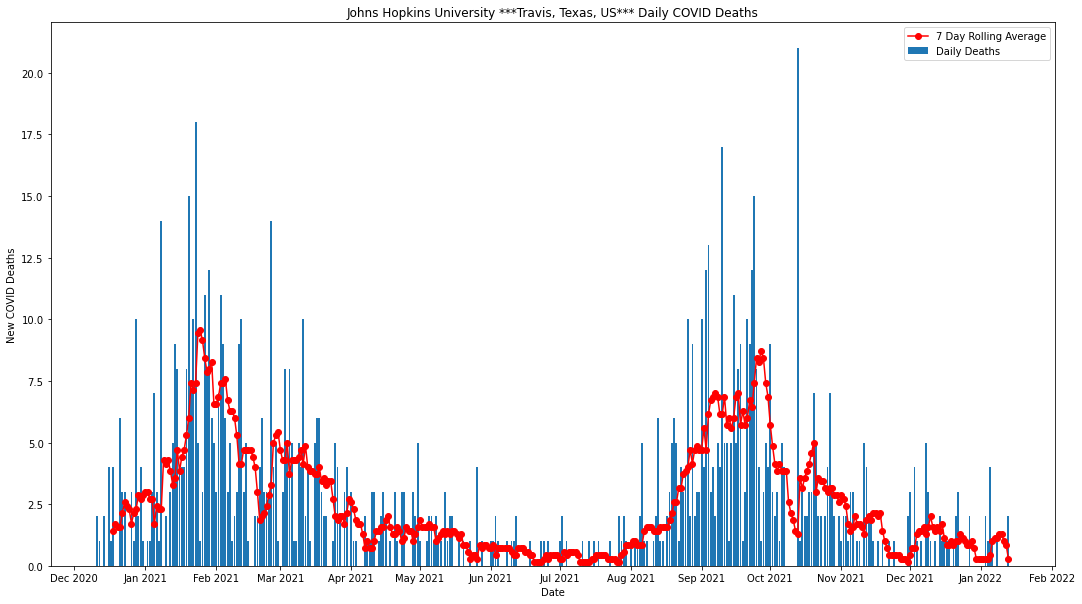

In [17]:
shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_deaths(df_jhu_total_dict, short_keys, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

Bronx, New York, US
Bronx, New York, US
Kings, New York, US
Kings, New York, US
New York, New York, US
New York, New York, US
Queens, New York, US
Queens, New York, US
Richmond, New York, US
Richmond, New York, US


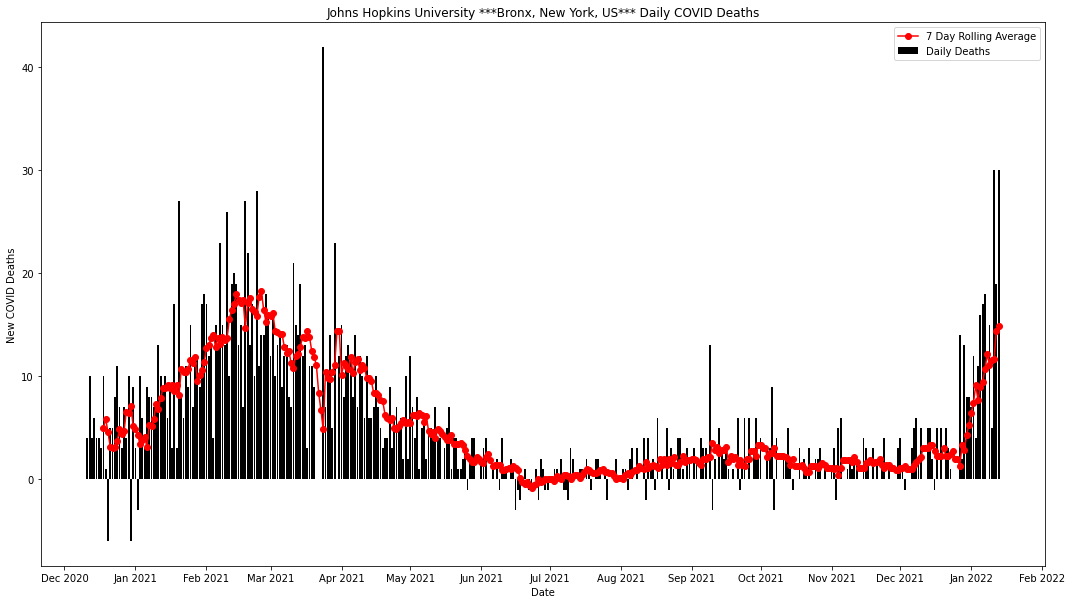

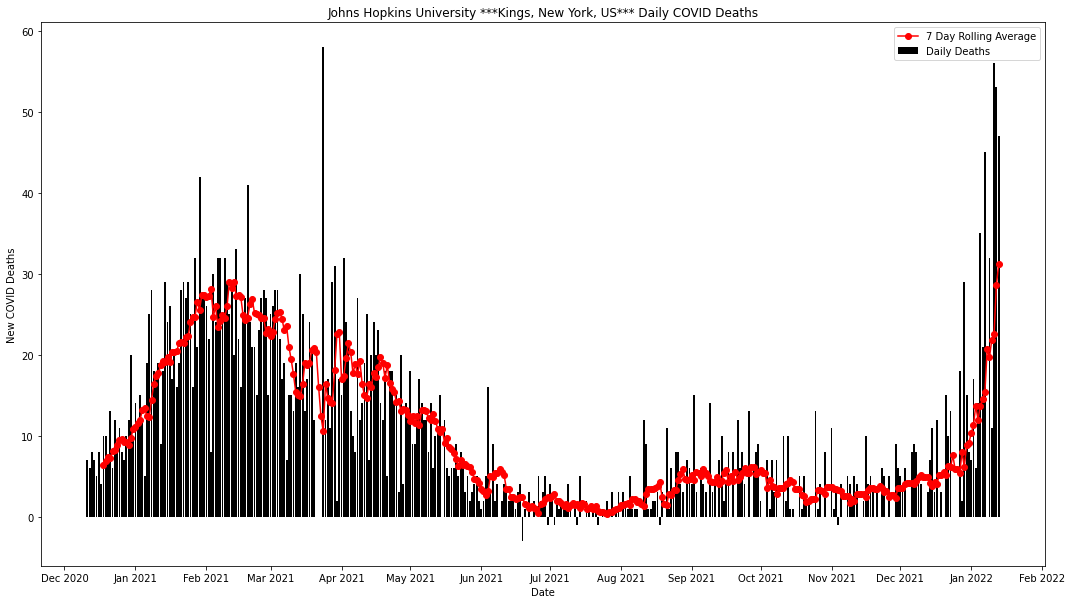

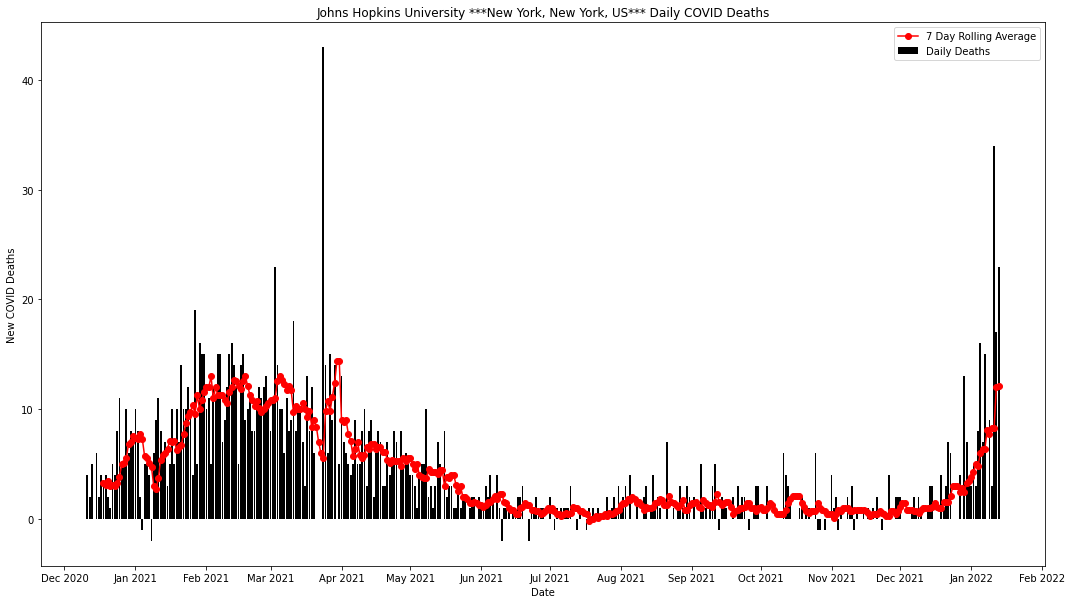

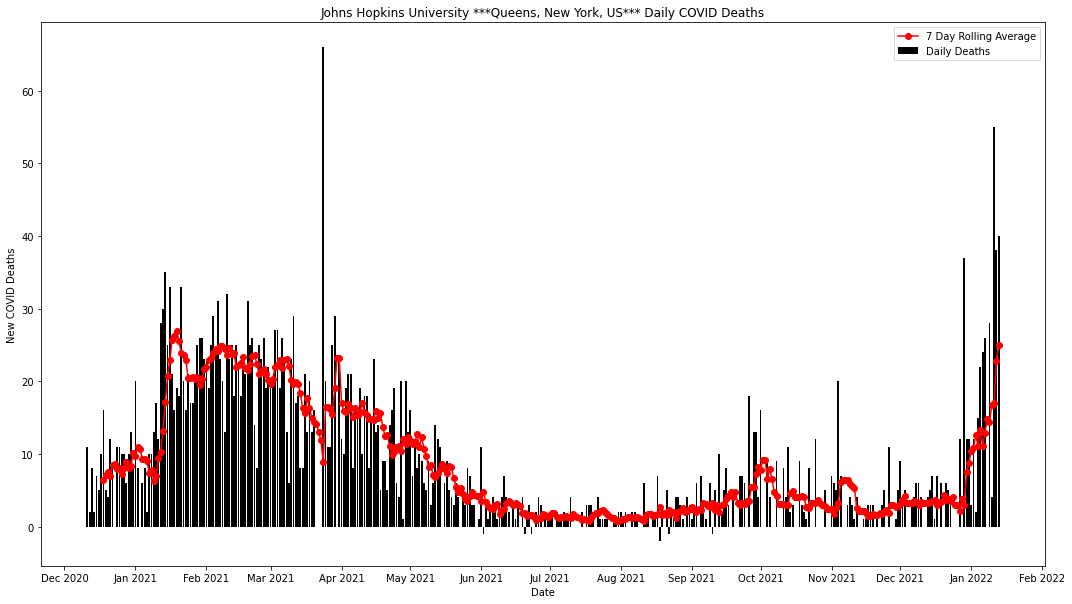

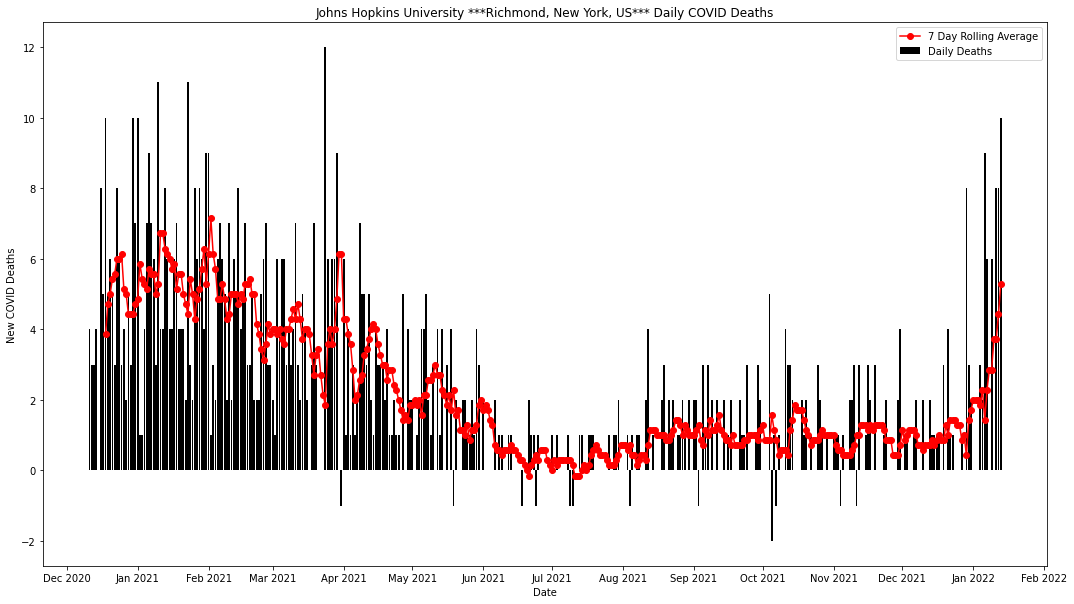

In [33]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_deaths(short_dict, short_keys, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

Bronx, New York, US
Bronx, New York, US
Kings, New York, US
Kings, New York, US
New York, New York, US
New York, New York, US
Queens, New York, US
Queens, New York, US
Richmond, New York, US
Richmond, New York, US


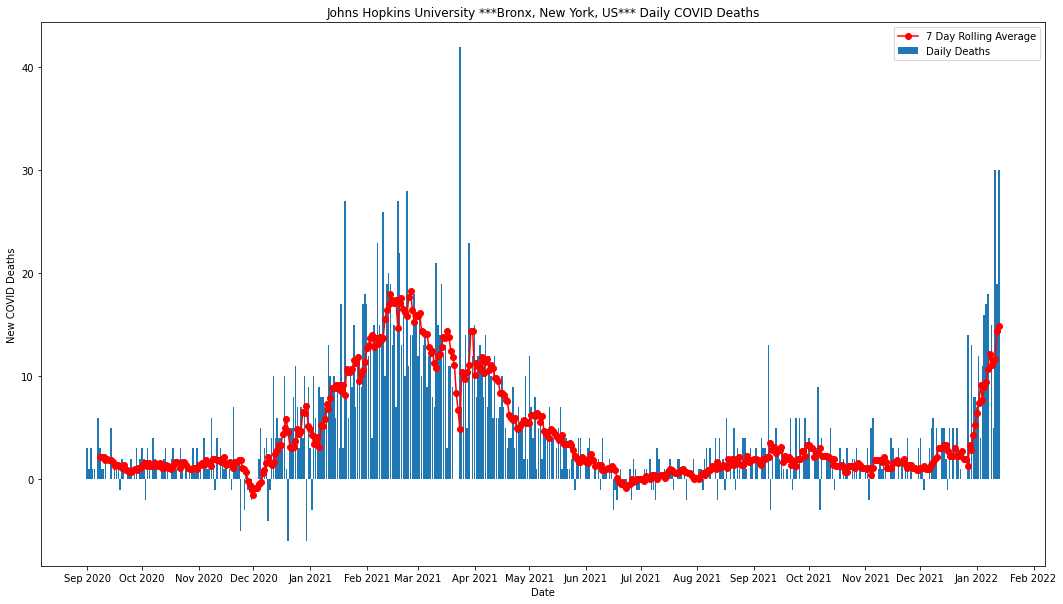

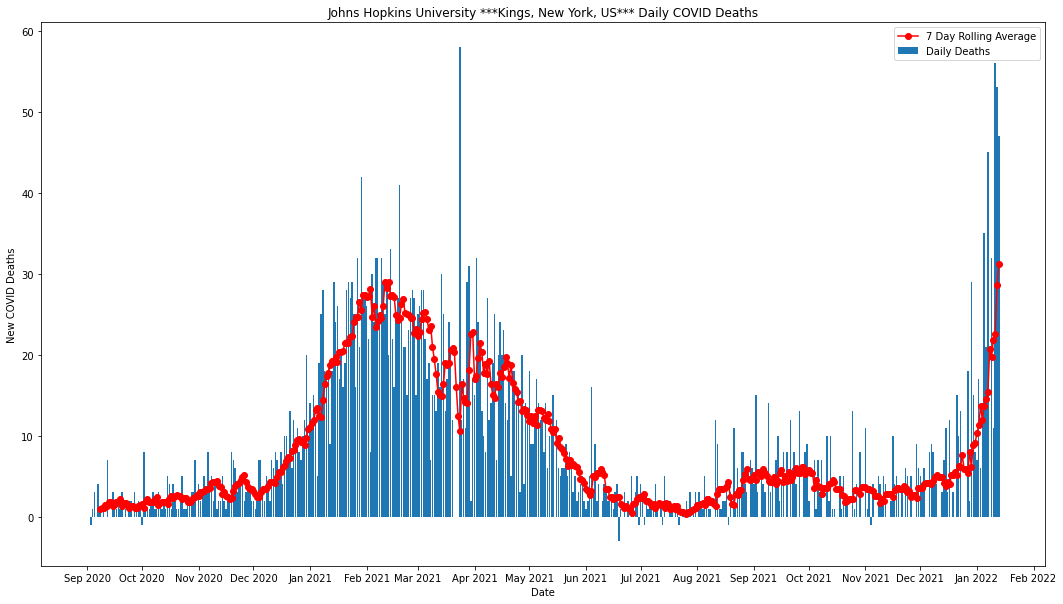

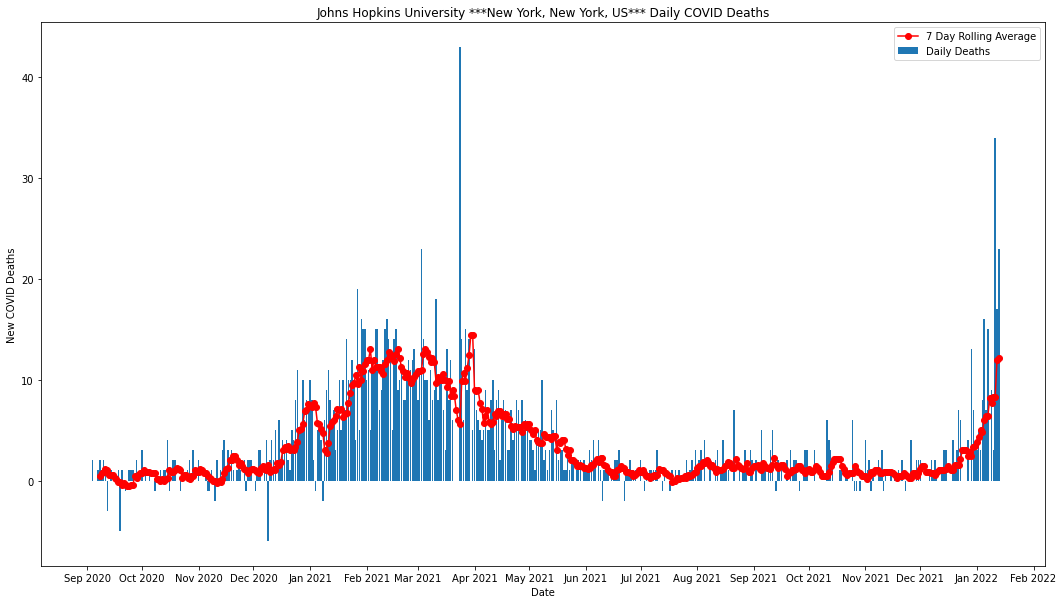

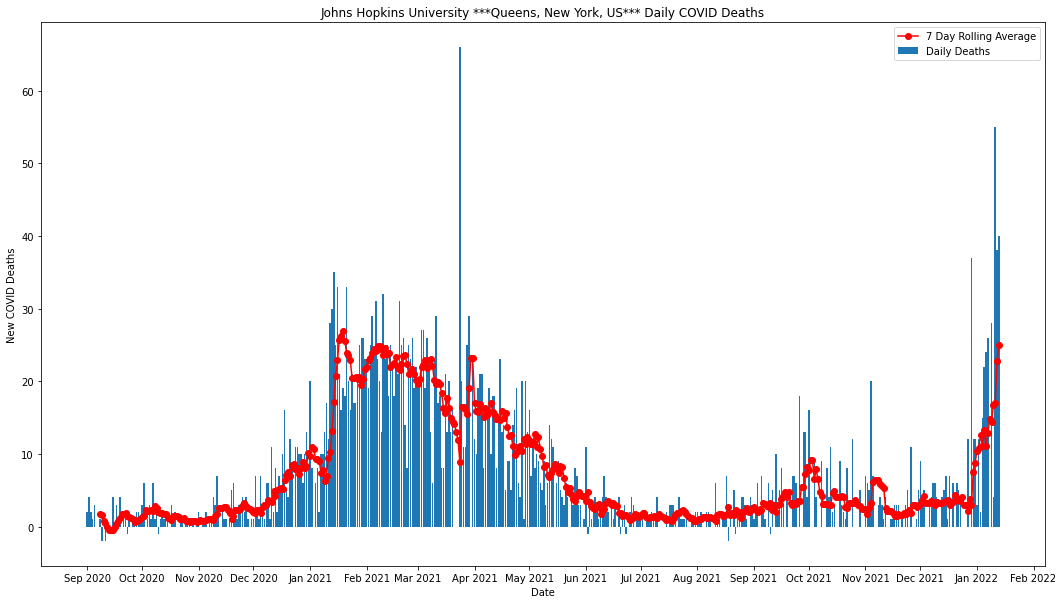

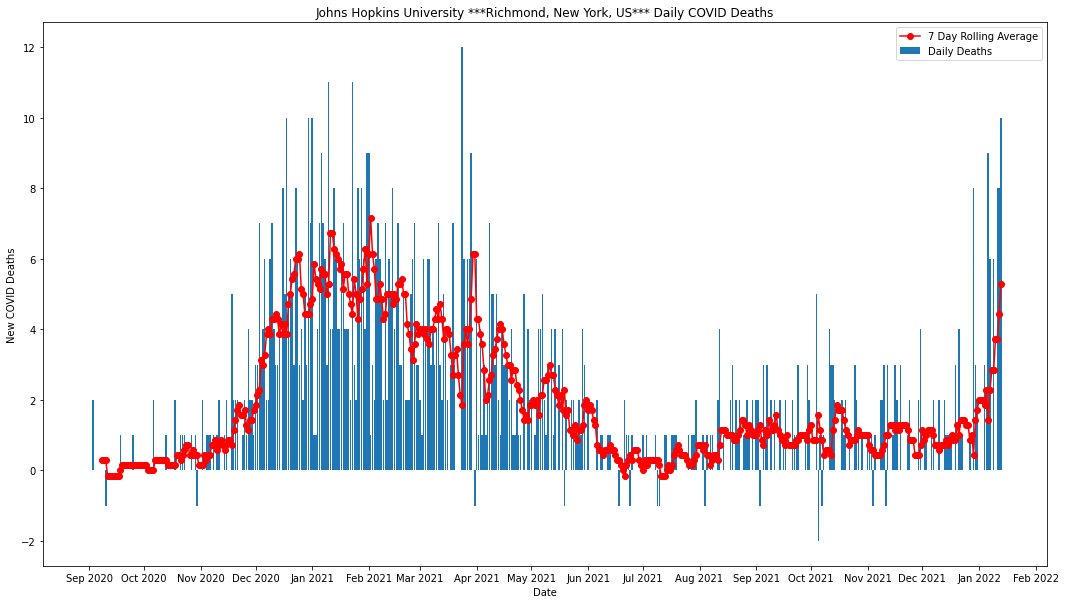

In [19]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_deaths(df_jhu_total_dict, date_list[-650::], comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

In [20]:
def process_combined_key_fatality_ratio(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Case_Fatality_Ratio']]
    ccc = bbb.set_index('dt_date')
#    ddd = ccc.diff(periods = 1)
    ccc_7day_moving = ccc.rolling(7).mean().shift()
    return(ccc,passed_combined_key,ccc_7day_moving)

In [21]:
def chart_daily_fatality_ratio(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Cases')
    plt.xlabel('Date',color='black')
    plt.ylabel('Case Fatality Ratio',color='black')
    plt.bar(passed_df.index,passed_df.Case_Fatality_Ratio)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Case Fatality Ratio'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_case_fatality_ratio(short_dict,short_keys, comkey)
    chart_daily_case_fatality_ratio(xxx[0], xxx[1], xxx[2])

In [22]:
def process_combined_key_incident_rate(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Incident_Rate']]
    ccc = bbb.set_index('dt_date')
 #  ddd = ccc.diff(periods = 1)
    ccc_7day_moving = ccc.rolling(7).mean().shift()
    return(ccc,passed_combined_key,ccc_7day_moving)

In [23]:
def chart_daily_incident_rate(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Cases')
    plt.xlabel('Date',color='black')
    plt.ylabel('Incident Rate',color='black')
    plt.bar(passed_df.index,passed_df.Incident_Rate)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Incident Rate'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')

short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_fatality_ratio(short_dict, short_keys, comkey)
    chart_daily_fatality_ratio(xxx[0], xxx[1], xxx[2])

short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_incident_rate(short_dict, short_keys, comkey)
    chart_daily_incident_rate(xxx[0], xxx[1], xxx[2])

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_incident_rate(df_jhu_total_dict, date_list, comkey)
    chart_daily_incident_rate(xxx[0], xxx[1], xxx[2])

shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_incident_rate(df_jhu_total_dict, date_list, comkey)
    chart_daily_incident_rate(xxx[0], xxx[1], xxx[2])

shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_fatality_ratio(df_jhu_total_dict, date_list, comkey)
    chart_daily_fatality_ratio(xxx[0], xxx[1], xxx[2])

aaa = []
for x in date_list:
    print(df_hhs[df_hhs.date == x]['total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'].sum()))
df_total_pediatric_patients_hospitalized_confirmed_and_suspected_covid = pd.DataFrame(aaa,columns=['date', 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'])

In [24]:
aaa = []
for x in range(1,len(date_list) - 1, 1):
    print(date_list[x + 1])
    print(df_jhu_total_dict[date_list[x + 1 ]][df_jhu_total_dict[date_list[x + 1]]['Country_Region'] =='US'][['Confirmed']].sum() - df_jhu_total_dict[date_list[x]][df_jhu_total_dict[date_list[x]]['Country_Region'] =='US'][['Confirmed']].sum())
    aaa.append((date_list[x + 1], int(df_jhu_total_dict[date_list[x + 1 ]][df_jhu_total_dict[date_list[x + 1]]['Country_Region'] =='US'][['Confirmed']].sum() - df_jhu_total_dict[date_list[x]][df_jhu_total_dict[date_list[x]]['Country_Region'] =='US'][['Confirmed']].sum())))
df_daily_us_total = pd.DataFrame(aaa,columns = ['date', 'new_cases'])

03-27-2020
Confirmed    17806
dtype: int64
03-28-2020
Confirmed    22352
dtype: int64
03-29-2020
Confirmed    16630
dtype: int64
03-30-2020
Confirmed    21120
dtype: int64
03-31-2020
Confirmed    26357
dtype: int64
04-01-2020
Confirmed    25173
dtype: int64
04-02-2020
Confirmed    30219
dtype: int64
04-03-2020
Confirmed    32300
dtype: int64
04-04-2020
Confirmed    33002
dtype: int64
04-05-2020
Confirmed    27970
dtype: int64
04-06-2020
Confirmed    30118
dtype: int64
04-07-2020
Confirmed    29097
dtype: int64
04-08-2020
Confirmed    32940
dtype: int64
04-09-2020
Confirmed    32839
dtype: int64
04-10-2020
Confirmed    34983
dtype: int64
04-11-2020
Confirmed    29959
dtype: int64
04-12-2020
Confirmed    28460
dtype: int64
04-13-2020
Confirmed    25255
dtype: int64
04-14-2020
Confirmed    26694
dtype: int64
04-15-2020
Confirmed    29318
dtype: int64
04-16-2020
Confirmed    31235
dtype: int64
04-17-2020
Confirmed    32175
dtype: int64
04-18-2020
Confirmed    32563
dtype: int64
04-19-2020


Confirmed    55996
dtype: int64
10-11-2020
Confirmed    46926
dtype: int64
10-12-2020
Confirmed    42062
dtype: int64
10-13-2020
Confirmed    51254
dtype: int64
10-14-2020
Confirmed    59203
dtype: int64
10-15-2020
Confirmed    65351
dtype: int64
10-16-2020
Confirmed    69225
dtype: int64
10-17-2020
Confirmed    57813
dtype: int64
10-18-2020
Confirmed    51220
dtype: int64
10-19-2020
Confirmed    66965
dtype: int64
10-20-2020
Confirmed    61917
dtype: int64
10-21-2020
Confirmed    62715
dtype: int64
10-22-2020
Confirmed    76341
dtype: int64
10-23-2020
Confirmed    83289
dtype: int64
10-24-2020
Confirmed    83923
dtype: int64
10-25-2020
Confirmed    63223
dtype: int64
10-26-2020
Confirmed    66148
dtype: int64
10-27-2020
Confirmed    78273
dtype: int64
10-28-2020
Confirmed    78644
dtype: int64
10-29-2020
Confirmed    91676
dtype: int64
10-30-2020
Confirmed    100453
dtype: int64
10-31-2020
Confirmed    90834
dtype: int64
11-01-2020
Confirmed    105774
dtype: int64
11-02-2020
Confirmed

05-06-2021
Confirmed    46955
dtype: int64
05-07-2021
Confirmed    48105
dtype: int64
05-08-2021
Confirmed    34519
dtype: int64
05-09-2021
Confirmed    22100
dtype: int64
05-10-2021
Confirmed    35153
dtype: int64
05-11-2021
Confirmed    34061
dtype: int64
05-12-2021
Confirmed    36192
dtype: int64
05-13-2021
Confirmed    38528
dtype: int64
05-14-2021
Confirmed    41862
dtype: int64
05-15-2021
Confirmed    29610
dtype: int64
05-16-2021
Confirmed    17442
dtype: int64
05-17-2021
Confirmed    27771
dtype: int64
05-18-2021
Confirmed    27798
dtype: int64
05-19-2021
Confirmed    29508
dtype: int64
05-20-2021
Confirmed    29843
dtype: int64
05-21-2021
Confirmed    28549
dtype: int64
05-22-2021
Confirmed    20574
dtype: int64
05-23-2021
Confirmed    13472
dtype: int64
05-24-2021
Confirmed    24444
dtype: int64
05-25-2021
Confirmed    23089
dtype: int64
05-26-2021
Confirmed    24532
dtype: int64
05-27-2021
Confirmed    27149
dtype: int64
05-28-2021
Confirmed    21923
dtype: int64
05-29-2021


11-28-2021
Confirmed    42149
dtype: int64
11-29-2021
Confirmed    192797
dtype: int64
11-30-2021
Confirmed    117485
dtype: int64
12-01-2021
Confirmed    138615
dtype: int64
12-02-2021
Confirmed    138443
dtype: int64
12-03-2021
Confirmed    158039
dtype: int64
12-04-2021
Confirmed    59246
dtype: int64
12-05-2021
Confirmed    49800
dtype: int64
12-06-2021
Confirmed    179789
dtype: int64
12-07-2021
Confirmed    113303
dtype: int64
12-08-2021
Confirmed    150870
dtype: int64
12-09-2021
Confirmed    122217
dtype: int64
12-10-2021
Confirmed    170736
dtype: int64
12-11-2021
Confirmed    54766
dtype: int64
12-12-2021
Confirmed    50566
dtype: int64
12-13-2021
Confirmed    187290
dtype: int64
12-14-2021
Confirmed    116094
dtype: int64
12-15-2021
Confirmed    144132
dtype: int64
12-16-2021
Confirmed    141742
dtype: int64
12-17-2021
Confirmed    192951
dtype: int64
12-18-2021
Confirmed    76479
dtype: int64
12-19-2021
Confirmed    86918
dtype: int64
12-20-2021
Confirmed    242235
dtype: i

In [25]:
df_daily_us_total.tail(1).new_cases

657    784659
Name: new_cases, dtype: int64

In [26]:
bbb = df_daily_us_total
bbb['date_dt'] = pd.to_datetime(bbb.date)
ccc = bbb
ccc = df_daily_us_total.set_index('date_dt')
ccc_rolling = ccc.rolling(7).mean().shift()

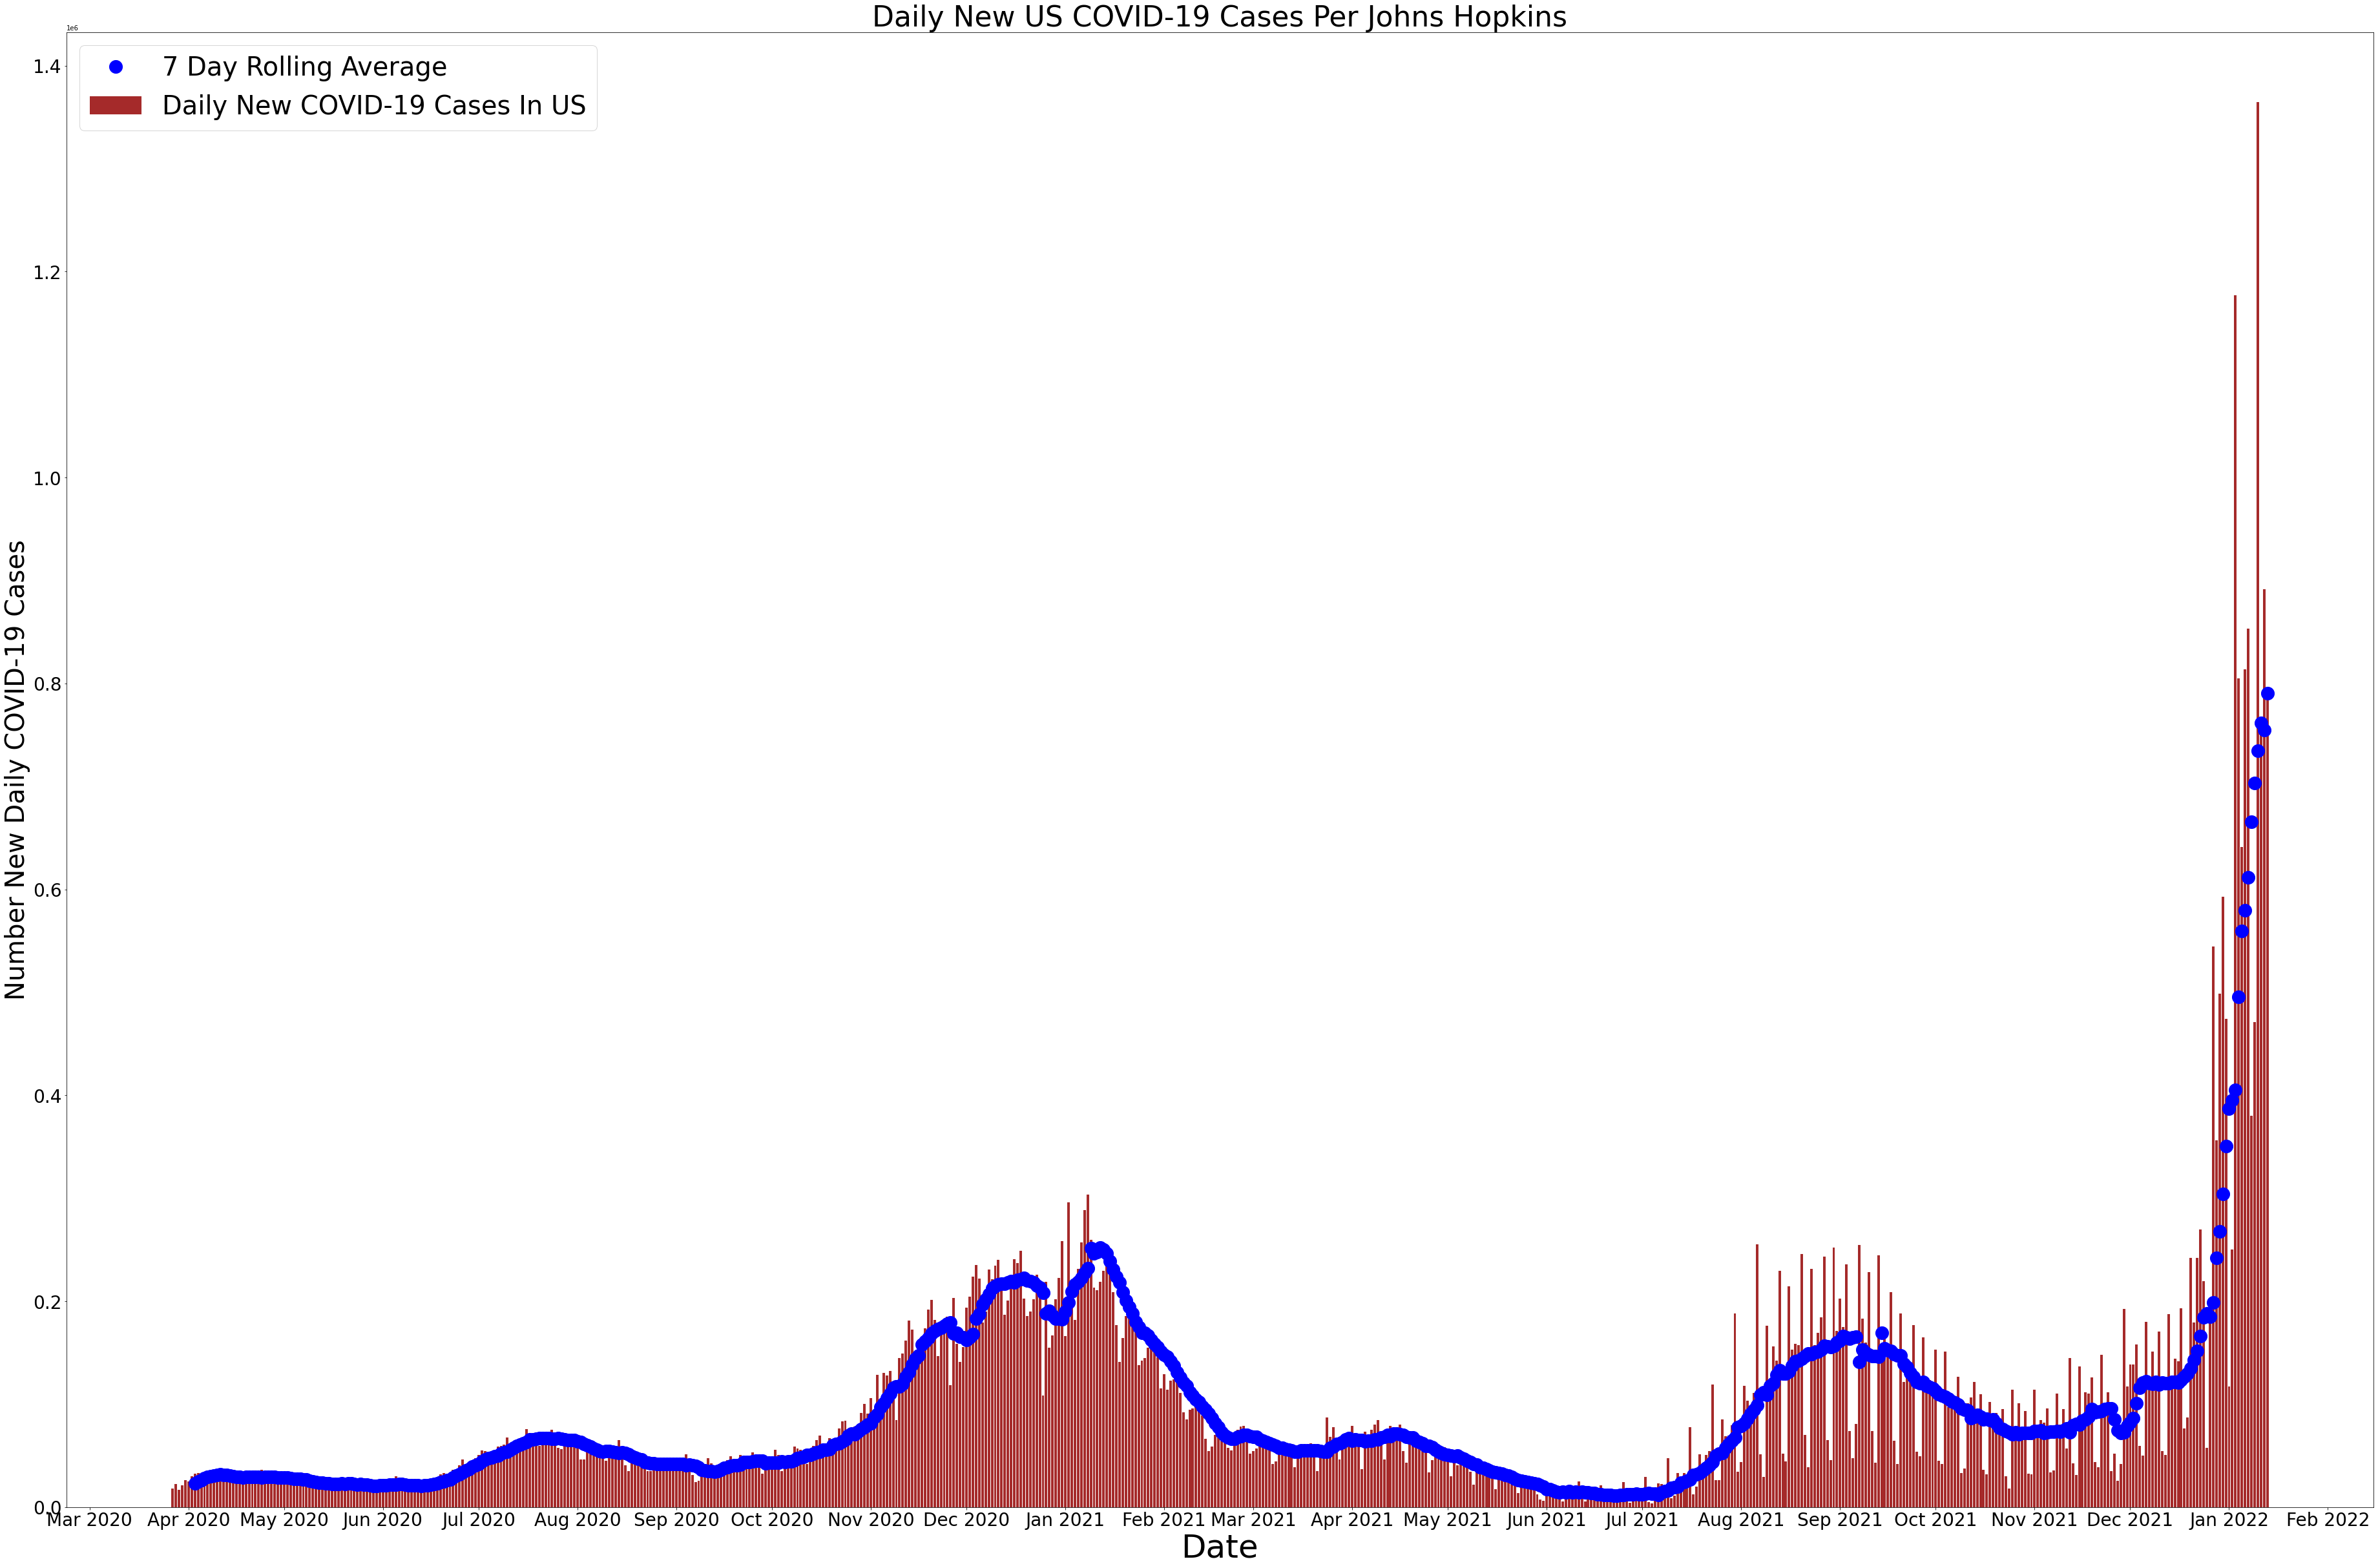

In [27]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(64,42)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Daily New US COVID-19 Cases Per Johns Hopkins', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 50)
plt.ylabel('Number New Daily COVID-19 Cases',color='black', fontsize = 40)
plt.bar(ccc.index, ccc.new_cases, color = 'brown')
plt.plot(ccc_rolling.new_cases, 'bo',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily New COVID-19 Cases In US'], fontsize = 40)
fig.savefig('JHU_new_daily_cases.png')

In [28]:
ccc_rolling.tail(5)


,new_cases
date_dt,
2022-01-09,703067.571429
2022-01-10,734610.285714
2022-01-11,761339.714286
2022-01-12,754928.142857
2022-01-13,790650.571429


In [29]:
ccc.tail()

,date,new_cases
date_dt,,
2022-01-09,01-09-2022,471253
2022-01-10,01-10-2022,1364418
2022-01-11,01-11-2022,759804
2022-01-12,01-12-2022,891474
2022-01-13,01-13-2022,784659


Suffolk, Massachusetts, US
Suffolk, Massachusetts, US


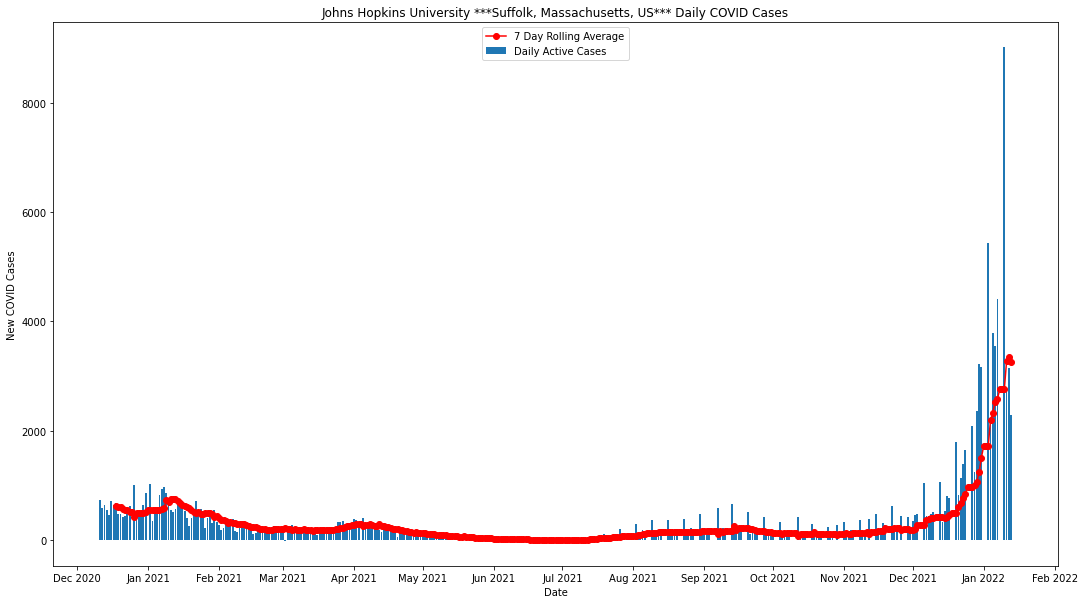

In [30]:
short_list = ['Suffolk, Massachusetts, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_confirmed(short_dict, short_keys, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])
    

Suffolk, Massachusetts, US
Suffolk, Massachusetts, US


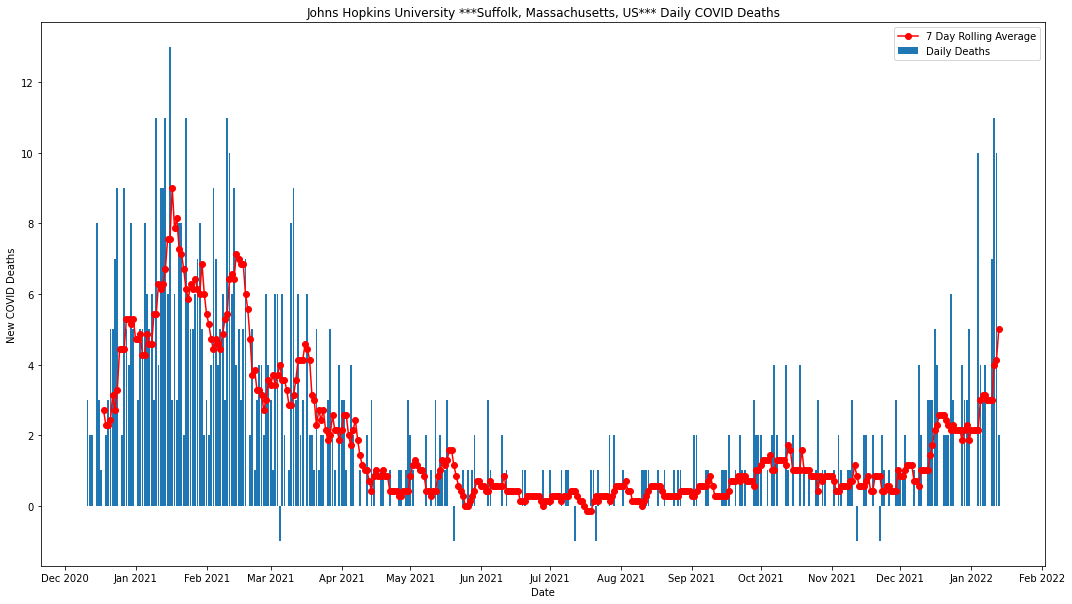

In [31]:
short_list = ['Suffolk, Massachusetts, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_deaths(short_dict, short_keys, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])